In [1]:
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

../circuit-analysis/graphs/add_sub_100
../circuit-analysis/graphs/mul_div
Task: ['add_sub'], Checkpoint 0 Node Count: 410
Task: ['add_sub']
Node Changes: [20, 22, 19, 16, 12, 13, 15, 1, 0, 35, 29, 22, 17, 12, 14, 7, 2]


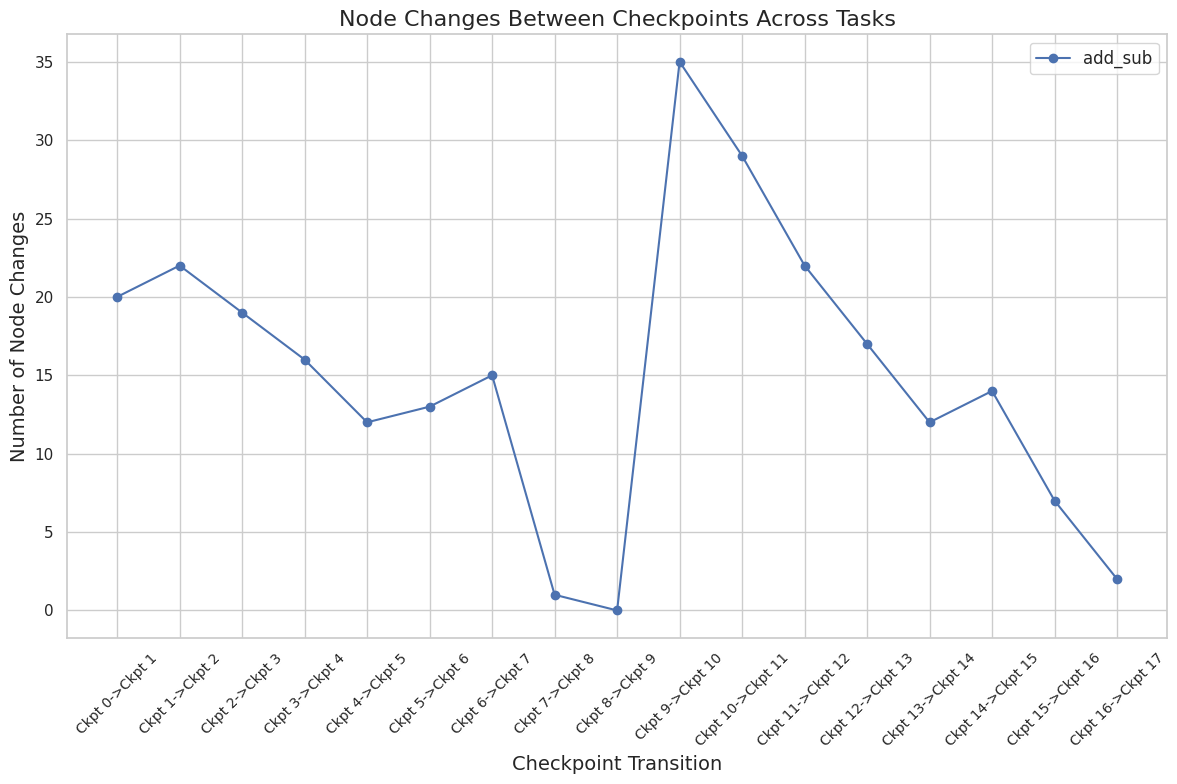

In [5]:
def get_files(ordered_checkpoint_folder: list[str]) -> list[str]:
    total_checkpoints = []
    for folder in ordered_checkpoint_folder:
        print(folder)
        checkpoints = load_checkpoints_in_order(folder)
        total_checkpoints.extend(checkpoints)

    return total_checkpoints

def load_checkpoints_in_order(task_dir):
    checkpoints = []
    files = [f for f in os.listdir(task_dir) if f.endswith('.json')]

    checkpoint_files = []
    for filename in files:
        match = re.search(r'checkpoint-(\d+)\.json', filename)
        if match:
            num = int(match.group(1))
            checkpoint_files.append((num, filename))

    checkpoint_files.sort(key=lambda x: x[0])

    for _, filename in checkpoint_files:
        checkpoint_path = os.path.join(task_dir, filename)
        with open(checkpoint_path, 'r') as f:
            data = json.load(f)
            checkpoints.append(data)

    return checkpoints

def count_nodes_per_checkpoint(checkpoints):
    node_counts = []
    for checkpoint in checkpoints:
        nodes = checkpoint['nodes']
        true_count = sum(1 for node, state in nodes.items() if state)
        node_counts.append(true_count)
    return node_counts

def calculate_node_changes(checkpoints):
    changes = []

    for i in range(1, len(checkpoints)):
        prev_nodes = checkpoints[i - 1]['nodes']
        curr_nodes = checkpoints[i]['nodes']

        added = sum(1 for node in curr_nodes if curr_nodes[node] and not prev_nodes.get(node, False))
        removed = sum(1 for node in prev_nodes if prev_nodes[node] and not curr_nodes.get(node, False))

        changes.append(added + removed)

    return changes

def visualize_multiple_tasks_node_changes(task_dirs, task_labels, output_dir):
    sns.set_theme(style="whitegrid")

    all_node_counts = []
    all_node_changes = []

    
    checkpoints = get_files(task_dirs)

    num_nodes_ckpt0 = len(checkpoints[0]['nodes'])
    print(f"Task: {task_labels}, Checkpoint 0 Node Count: {num_nodes_ckpt0}")

    node_counts = count_nodes_per_checkpoint(checkpoints)
    node_changes = calculate_node_changes(checkpoints)

    all_node_counts.append(node_counts)
    all_node_changes.append(node_changes)

    print(f"Task: {task_labels}")
    print(f"Node Changes: {node_changes}")

    # Plot line chart - node changes for each task
    plt.figure(figsize=(12, 8))
    for node_changes, label in zip(all_node_changes, task_labels):
        transitions = range(1, len(node_changes) + 1)
        plt.plot(transitions, node_changes, marker='o', linestyle='-', label=label)

    plt.xlabel('Checkpoint Transition', fontsize=14)
    plt.ylabel('Number of Node Changes', fontsize=14)
    plt.title('Node Changes Between Checkpoints Across Tasks', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(
        range(1, len(all_node_changes[0]) + 1),
        [f'Ckpt {i}->Ckpt {i+1}' for i in range(len(all_node_changes[0]))],
        fontsize=10,
        rotation=45
    )
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'multiple_tasks_node_changes.pdf'))
    plt.show()

output_dir = './visualizations'
os.makedirs(output_dir, exist_ok=True)
visualize_multiple_tasks_node_changes(['../circuit-analysis/graphs/add_sub_100', '../circuit-analysis/graphs/mul_div'],['add_sub'], './visualizations')

In [2]:
with open('results/results_add_sub.json', 'r') as f:
        checkpoint_data_first = json.load(f)

with open('results/results_mul_div.json', 'r') as f:
        checkpoint_data_second = json.load(f)
            

In [3]:
sorted_data_first = sorted(checkpoint_data_first, key=lambda x: int(x['adapter'].split('-')[1]))
sorted_data_second = sorted(checkpoint_data_second, key=lambda x: int(x['adapter'].split('-')[1]))
sorted_data_first.extend(sorted_data_second)


In [4]:
faithfulness_ls = []
for checkpoint in sorted_data_first:
    faithfulness_ls.append(checkpoint['baseline_performance_exact'])

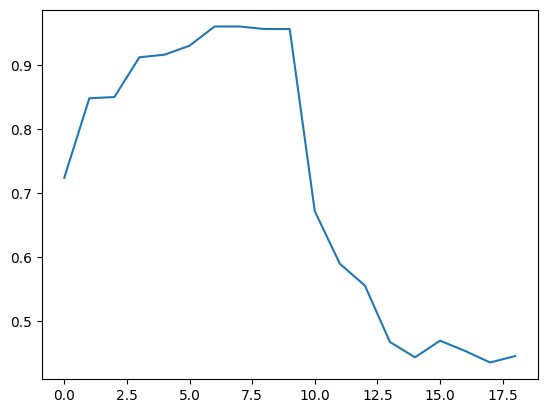

In [5]:
plt.plot(faithfulness_ls)